# Baseline Setup on VGG19

Use this notebook to recreate the results of the original paper on the VGG19 network.

In [2]:
import os
import time
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# install dependencies
! pip install torchtoolbox

     |████████████████████████████████| 84 kB 4.6 MB/s 
     |████████████████████████████████| 4.0 MB 76.8 MB/s 
     |████████████████████████████████| 596 kB 65.8 MB/s 
     |████████████████████████████████| 880 kB 77.2 MB/s 
     |████████████████████████████████| 77 kB 9.2 MB/s 
     |████████████████████████████████| 6.6 MB 65.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=cd12d4afae6488ebb7130656795e5f9444c2026851a3e89649b0f60780b88d35
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.special import kl_div

In [5]:
original = glob.glob('/gdrive/MyDrive/practical_deep_learning/project/cd3250_experiments/labels/label_files/cifar10_original/*.npy')
new = glob.glob('/gdrive/MyDrive/practical_deep_learning/project/cd3250_experiments/labels/label_files/entropy/*.npy')

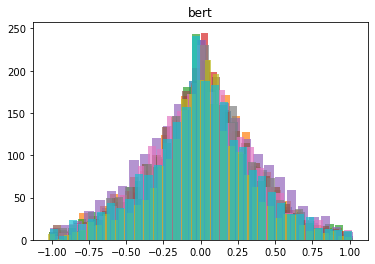

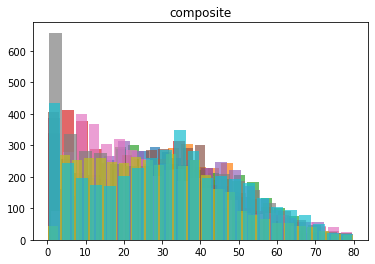

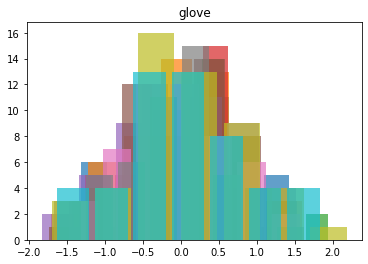

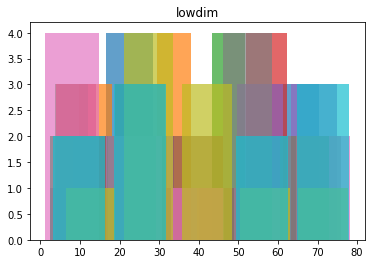

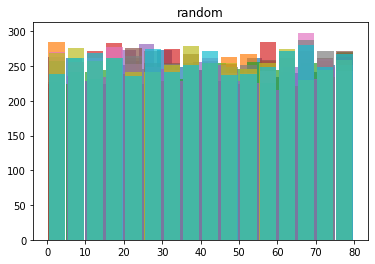

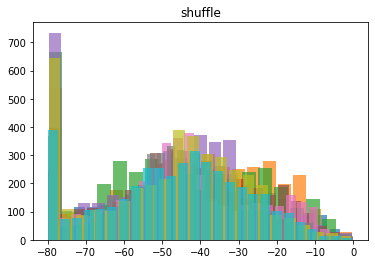

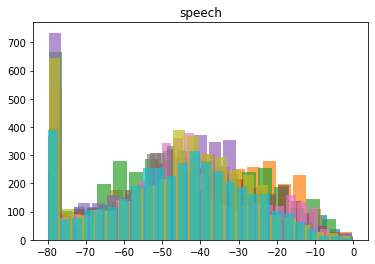

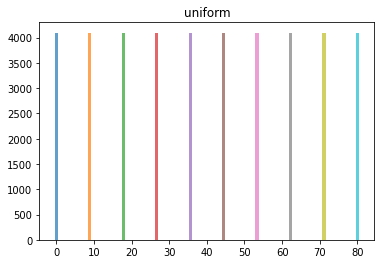

In [6]:
for file in original:

  array = np.load(file)
  name = file.split('/')[-1].split('_')[-1][:-4]

  for i in range(10):
    plt.hist(x=array[i].flatten(), bins='auto', alpha=0.7, rwidth=0.85)

  plt.title(name)
  plt.show()

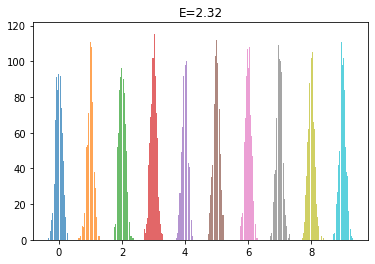

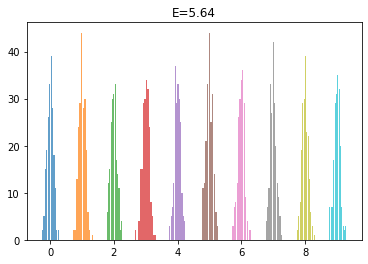

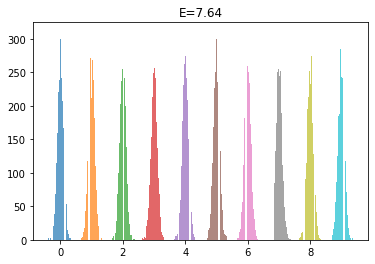

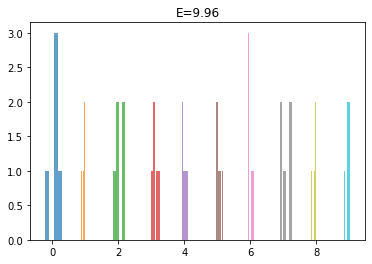

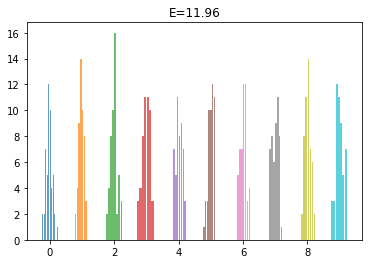

In [6]:
epsilons = ['E=2.32', 'E=5.64', 'E=7.64', 'E=9.96', 'E=11.96']
dims = ['5','50','200','1000','4000']

counter = 0
for file in new:
  name = file.split('/')[-1]
  if name.split('=')[-1][:-4] not in dims:
    continue
  array = np.load(file)
  name = file.split('/')[-1]

  for i in range(10):
    plt.hist(x=array[i].flatten(), bins='auto', alpha=0.7, rwidth=0.85)

  plt.title(epsilons[counter])
  counter += 1
  plt.show()

In [12]:
start = time.time()
! python /gdrive/MyDrive/practical_deep_learning/project/original_experiments/train.py --model vgg19 --dataset cifar10 --seed 7 --label category --base_dir /gdrive/MyDrive/practical_deep_learning/project/outputs
end = time.time()
print("Time:", end-start)

Start training 100% cifar10 category model with manual seed 7 and model vgg19.
Best model location: /gdrive/MyDrive/practical_deep_learning/project/outputs/cifar10/seed7/vgg19/model_category/category_seed7_vgg19_best_model.pth.
Checkpoint location: /gdrive/MyDrive/practical_deep_learning/project/outputs/cifar10/seed7/vgg19/model_category/category_seed7_vgg19_checkpoint.pth.
Log location: /gdrive/MyDrive/practical_deep_learning/project/outputs/log/cifar10_category_log.csv.
Snapshots location: /gdrive/MyDrive/practical_deep_learning/project/outputs/cifar10/seed7/vgg19/model_category/snapshots
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Number of Epochs : 100
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if 